This is one VERY simple example how to use RVmod as a fitting library. 
The RVmod options however, are a lot more. Reminder: the Exo-Striker 
GUI interface is warped around the RVmod. 


This example script delas with the Eta Ceti system (the usual demo in 
the Exo-Striker tool) and demonstrates how to fit Keplerian 
and Dynamical models to RV data.


1. We add the RV data
2. We find the RV offsets
3. We apply approx. parameters (to be taken from a GLS, for example.)
4. We fit to get the best two-planet Keplerian model
5. We adopt the best Keplerian fit and we include the dynamics into the modeling.
6. We make a simple plot showing the deviation between Keplerian and N-body models.

There are some (commented) examples how one can run mcmc and/or nested sampling
to get errors and/or posterior distributions. 

More detailed examples of how to use the RVmod will be provided 
as Jupyter notebooks in future.


Created on Sun Jun  2 09:30:02 2019

@author: Trifon Trifonov

In [1]:
# %load RVmod_as_py_lib_kep_vs_dyn_example.py
#!/usr/bin/env python3

import sys 
sys.path.append('../exostriker/lib/') #RV_mod directory must be in your path
import RV_mod as rv

# Lets create the RVmod object
fit=rv.signal_fit('Eta Ceti demo',readinputfile=False);

fit.cwd = '../exostriker/' # it is also important that the ES current working directory (cwd) 
# point to the "lib" directory. This will be fixed in future releases 

# add the stellar mass
fit.params.stellar_mass = 1.7 # In M sol. 

ImportError: No module named pathos

Lets add the RV data

In [7]:
fit.add_dataset("hip5364_lick", "../exostriker/datafiles/hip5364.vels",0.0,0.0)  # the last two entries are initial offset and jitter
fit.add_dataset("hip5364_VLT", "../exostriker/datafiles/hip5364_crires.vels",0.0,0.0)


# Lets not fit for jitters now, i.e. keep at the initial value of 0 m/s
fit.use.use_jitters[0] = False
fit.use.use_jitters[1] = False


#  Run it once to find the RV offsets, no planets yet.
fit.fitting(outputfiles=[1,1,1], doGP=False,  minimize_fortran=True, minimize_loglik=False, amoeba_starts=20, print_stat=False)

#lets print the best fit params  
print("Loglik = %s"%fit.loglik)
fit.print_info() #this is an obsolete function call, will be replaced!

Loglik = -7615.90178312
 
Fit properties: 
 chi^2: 14584.879612 
 reduced chi^2: 116.679037 
 rms: 52.257374 
 loglik: -7615.901783
            
RV signal data was provided in 2 files. We expect these files to have following offsets and jitters:


 hip5364_lick    
 offset: -0.1422 +/-  0.4036 
 jitter:  0.0000 +/-  0.0000            

 hip5364_VLT     
 offset: 689.6746 +/-  7.1838 
 jitter:  0.0000 +/-  0.0000            

The system has no planets. 
             


Add the planetary initial estimates:
Adding planets can be done automatically using the GLS first, but this will be covered in another intro. 
Since we know aprrox. the Keplerian parameters lets dirrectly add them as initial params.

In [8]:
fit.add_planet(50,  400,  0.10,  200, 230, 90.0, 0.0)  # K,P,e,omega,M0,i,Omega of planet 1
fit.add_planet(50,  770,  0.10,  170, 170, 90.0, 0.0)  # K,P,e,omega,M0,i,Omega of planet 2 


# lets fix the eccentricities first, this is advisable if you don't know well the system you are fitting.
fit.use.update_use_planet_params_one_planet(0,True,True,False,True,True,False,False)     
fit.use.update_use_planet_params_one_planet(1,True,True,False,True,True,False,False)     

# alternativly one can apply priors on the eccentricity, but this will be another exercise.... 
# one must get familiar with the priors 
# for example:
#fit.e_norm_pr[0] = [0.0,0.1, True] first is \mu, second is \sigma, the Boolean is weather to use or not the prior
#fit.e_norm_pr[1] = [0.0,0.1, True]
#also if you apply priors with the fitting you must select minimize_fortran=False to use the SciPy wrapper.


Lets fit again with jitter fixed, and then again with jitter optimized

In [9]:
fit.fitting(outputfiles=[1,1,1], doGP=False,  minimize_fortran=True,  minimize_loglik=False, amoeba_starts=20, print_stat=False)

#lets print the best fit params  
print("Loglik = %s"%fit.loglik)
fit.print_info() #this is an obsolete function call, will be replaced!

 
# We can now relax the eccentricities and jitters
fit.use.update_use_planet_params_one_planet(0,True,True,True,True,True,False,False)     
fit.use.update_use_planet_params_one_planet(1,True,True,True,True,True,False,False)     

fit.use.use_jitters[0] = True
fit.use.use_jitters[1] = True


fit.fitting(outputfiles=[1,1,1], doGP=False,  minimize_fortran=True,  minimize_loglik=True, amoeba_starts=20, print_stat=False)

#lets print the best fit params  
print("Loglik = %s"%fit.loglik)
fit.print_info() #this is an obsolete function call, will be relaced!

Loglik = -1065.93910443
 
Fit properties: 
 chi^2: 1484.954254 
 reduced chi^2: 12.691917 
 rms: 17.826520 
 loglik: -1065.939104
            
RV signal data was provided in 2 files. We expect these files to have following offsets and jitters:


 hip5364_lick    
 offset: -1.0678 +/-  0.9855 
 jitter:  0.0000 +/-  0.0000            

 hip5364_VLT     
 offset: 675.2283 +/-  7.3359 
 jitter:  0.0000 +/-  0.0000            

The system has 2 planets. 

Known planets are expected to have following properties (mean anomalies for epoch 2451745.99):

 Planet  1: 
 signal semiamplitude = 49.4539 +/- 0.6736 m/s 
 period = 403.7160 +/- 0.3721  days 
 orbit eccentricity = 0.1000 +/- 0.0000 
 argument of periastron = 249.2954 +/- 7.0586 
 mean anomally = 195.8637 +/- 7.6023 
 inclination = 90.0000 +/- 0.0000 
 line of nodes = 0.0000 +/- 0.0000 
 mass  = 2.5515 M_Jup 
 orbit semimajor axis = 1.2765 AU


 Planet  2: 
 signal semiamplitude = 52.5681 +/- 0.7480 m/s 
 period = 752.3327 +/- 0.9635  day

Now lets fit a dynamical model starting from the best Keplerian derived above

In [10]:
#first lets copy the Keplerian object, we will need it later for plotting
import dill

kep_fit = dill.copy(fit)


fit.mod_dynamical=True 

fit.fitting(outputfiles=[1,1,1], doGP=False,  minimize_fortran=True,  minimize_loglik=True, amoeba_starts=20, print_stat=False, eps=1000, dt=10, npoints=6000, model_max=0, model_min=0)

#lets print the best fit params  
print("Loglik = %s"%fit.loglik)
fit.print_info() #this is an obsolete function call, will be replaced!
 
 
#lets copy the fit object as dyn_fit, we will need it later for plotting 
dyn_fit = dill.copy(fit)

Loglik = -533.515721154
 
Fit properties: 
 chi^2: 125.661080 
 reduced chi^2: 1.112045 
 rms: 16.693936 
 loglik: -533.515721
            
RV signal data was provided in 2 files. We expect these files to have following offsets and jitters:


 hip5364_lick    
 offset:  0.5773 +/-  0.0000 
 jitter: 14.8226 +/-  0.0000            

 hip5364_VLT     
 offset: 695.2901 +/-  0.0000 
 jitter: 13.2369 +/-  0.0000            

The system has 2 planets. 

Known planets are expected to have following properties (mean anomalies for epoch 2451745.99):

 Planet  1: 
 signal semiamplitude = 51.7814 +/- 0.0000 m/s 
 period = 403.7728 +/- 0.0000  days 
 orbit eccentricity = 0.1501 +/- 0.0000 
 argument of periastron = 273.7938 +/- 0.0000 
 mean anomally = 172.7752 +/- 0.0000 
 inclination = 90.0000 +/- 0.0000 
 line of nodes = 0.0000 +/- 0.0000 
 mass  = 2.6549 M_Jup 
 orbit semimajor axis = 1.2766 AU


 Planet  2: 
 signal semiamplitude = 53.7516 +/- 0.0000 m/s 
 period = 751.3788 +/- 0.0000  days 


Lets make some basic plots with the "fit" object results

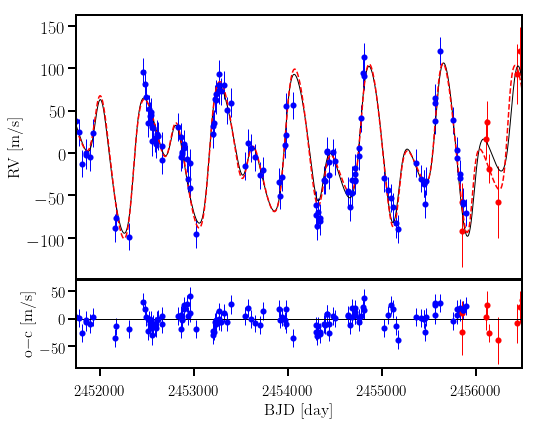

In [12]:
################# Plotting #############################
 

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl

import numpy as np

###### For nice plotting ##############

mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='2'

# set tick width
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2

mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2


mpl.rc('text',usetex=True)
font = {'family' : 'normal','weight' : 'bold','size'   : 18,'serif':['Helvetica']}
mpl.rc('font', **font)



################## Time series plotting ###############

f = plt.figure(0, figsize=(8,6.5))
plt.subplots_adjust(hspace=0.005)
format_im = 'pdf'
dpi = 300

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
#gs.update(  wspace=0.05)

ax1 = plt.subplot(gs[:-1, -1])
ax2 = plt.subplot(gs[-1, -1])

 
color = ['b', 'r', 'g', 'r']
symbol = ['o', 'o', 'o', 'o']   
markersize = [6, 6, 6, 6] 
alpha = [1, 1, 1, 1]

model_color = 'k'
model_lw = '1.0'


#### Get the time series (these below are self explanatory) ########     
jd        = kep_fit.fit_results.rv_model.jd
rvs       = kep_fit.fit_results.rv_model.rvs
rv_err    = kep_fit.fit_results.rv_model.rv_err
o_c       = kep_fit.fit_results.rv_model.o_c

data_set  = kep_fit.filelist.idset

# we can add the jitter
add_jitter = True
if add_jitter == True:
    rv_err = np.array([np.sqrt(rv_err[i]**2 + kep_fit.params.jitters[ii]**2)  for i,ii in enumerate(data_set)])



# Kep model time series #
kep_model_x = kep_fit.fit_results.model_jd
kep_model_y = kep_fit.fit_results.model

# Dyn model time series #
dyn_model_x = dyn_fit.fit_results.model_jd
dyn_model_y = dyn_fit.fit_results.model

###################################################################



zero_point_T = range((int(min(jd))-10),(int(max(jd))-10),10)
zero_point   = np.zeros(len(zero_point_T))


ax1.plot(kep_model_x, kep_model_y,       '-', linewidth=model_lw, color=model_color)
ax2.plot(zero_point_T,zero_point,'-', linewidth=model_lw, color=model_color)      

overplot_dyn = True
if overplot_dyn == True:
    ax1.plot(dyn_model_x, dyn_model_y,       '--', linewidth=1.5, color='r')

for i in range(len(data_set)):

        ax1.errorbar(jd[i],rvs[i], yerr=rv_err[i], alpha=alpha[int(data_set[i])], fmt=symbol[int(data_set[i])], linestyle='None', markersize = markersize[int(data_set[i])], color=color[int(data_set[i])], capsize = 0, elinewidth=1,mew=0.1)
        ax2.errorbar(jd[i],o_c[i], yerr=rv_err[i], alpha=alpha[int(data_set[i])], fmt=symbol[int(data_set[i])], linestyle='None', markersize = markersize[int(data_set[i])],color=color[int(data_set[i])], capsize = 0, elinewidth=1,mew=0.1)


 
ax1.set_ylabel(r'RV [m/s]',fontsize=16, rotation = 'vertical') 
ax1.set_xlim(min(jd),max(jd))
 

ax2.set_xlabel(r'BJD [day]',fontsize=16)
ax2.set_ylabel(r'o$-$c  [m/s]',fontsize=16, rotation = 'vertical') 
ax2.set_xlim(min(jd),max(jd))

ax2.locator_params(axis="x", nbins=9)
plt.setp( ax2.get_yticklabels(), fontsize=15,weight='bold')
plt.setp( ax2.get_xticklabels(), fontsize=15,weight='bold')
 
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
 
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False) 

plt.show()
#plt.savefig('RV_plot_example.%s'%(format_im), format=format_im,dpi=dpi, bbox_inches='tight' )
ax1.cla() 
ax2.cla()

In [14]:


#####################


# Run MCMC 
#fit = rv.run_mcmc(fit, burning_ph=1000, mcmc_ph=5000, threads=30, output=False, fileoutput=True,save_means=False, save_mode=True, save_maxlnL=False)

# Run Nested sampling 

#fit = rv.run_nestsamp(fit, threads=30, std_output=False, stop_crit = 0.0001, Dynamic_nest = False, live_points = 500, fileoutput=True, save_means=False, save_mode=False, save_maxlnL=True)

# WARNING! setup the bounds/prioirs first. Usually these are wide open and if you dont set them up 
# it my take forever for the Nest. Samp. to finish. Unfortunatly I have to provide another example how to work with the RVmod priors/
# Work in progress....
      



#if you already have a session saved you may try:

#import dill

#file = open("session.ses", 'rb')
#fit = dill.load(file)
#file.close()     

# and then for example
#fit = rv.run_mcmc(fit, burning_ph=1000, mcmc_ph=5000, threads=30, output=False, fileoutput=True, save_means=False, save_mode=True, save_maxlnL=False)